<a href="https://colab.research.google.com/github/munsejin/Study2/blob/master/DL007_%EA%B5%AC%EA%B8%80%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8B%A4%EC%9A%B4%EB%A1%9C%EB%93%9C%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 이미지 다운로드 하기

- 자신의 PC에서 구글 이미지를 스크롤한 후 이를 다운 받을 수 있다 (구글은 700장의 사진까지 가능)

- 스크롤한 이미지의 URL을 저장하는 자바스크립트를 수행.

><font color=red><b>리눅스나 윈도우에서는 Ctrl+Shift+J를 누루고, 맥Os에서는 Cmd+Opt+J 를 누름</b></font>

- 구글에서 이미지를 검색 (black bear로 검색)하고 스크롤

- 아래 스크립트를 실행

><font color=red><b>urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));</b></font>

- 다운로드라는 이름을 파일명.csv로 변경 - 스크롤 시에 보였던 이미지들의 링크주소가 저장되어 있음

- 같은 방법으로 white bear, grizzly bear를 검색하고 동일한 작업을 수행

## 이미지를 다운로드할 폴더를 만들고 위에서 만든 url 파일을 업로드

In [ ]:
!pip install fastai

In [ ]:
# fastai 패키지 설치
from fastai import *
from fastai.vision import *

In [ ]:
import os, os.path, shutil

# 폴더 생성
if not os.path.exists("./bears"):
    os.makedirs("./bears")

In [ ]:
# 구글에서 검색한 이미지 주소 url 목록 업로드 blackbear.csv, whitebear.csv, grizzlybear.csv 파일을 모두 선택
from google.colab import files
files.upload()

Saving blackbear.csv to blackbear (1).csv
Saving grizzlybear.csv to grizzlybear.csv
Saving whitebear.csv to whitebear.csv


{'blackbear.csv': b'http://igbconline.org/wp-content/uploads/2016/02/grizzly-and-black-bear-differences.jpg\nhttps://upload.wikimedia.org/wikipedia/commons/thumb/0/08/01_Schwarzb%C3%A4r.jpg/220px-01_Schwarzb%C3%A4r.jpg\nhttps://bear.org/wp-content/uploads/2017/10/Bear-by-pine.jpg\nhttps://www.fws.gov/southeast/images/hero/louisiana-black-bear.jpg\nhttps://www.turpentinecreek.org/wp-content/uploads/2018/02/Koda-13-945x1024.jpg\nhttps://wildsafebc.com/wp-content/uploads/2017/07/blackbear-e1501281687765.jpg\nhttps://www.mdwfp.com/media/253603/_bear_black_frontal.gif?width=500&height=331.9292333614153\nhttps://media.phillyvoice.com/media/images/Black_Bear_SEPTA.2e16d0ba.fill-735x490.png\nhttps://clearcreekcounty.org/wp-content/uploads/2016/11/wildlife_blackbear.jpg\nhttps://wdfw.wa.gov/sites/default/files/styles/page_body_half_width/public/2019-02/1666scr_1.jpg?itok=0HlEzETc\nhttps://images.immediate.co.uk/production/volatile/sites/23/2014/08/GettyImages-635725340-33bbe2e.jpg?quality=45&re

In [ ]:
!ls

bears  data  sample_data


In [ ]:
# csv 파일을 bears 폴더로 이동
!mv *.csv bears
!ls bears

mv: cannot stat '*.csv': No such file or directory
 blackbear	      blackbear.csv   grizzlybear.csv
'blackbear (1).csv'   grizzleybear    whitebear.csv


## 파일 다운로드

In [ ]:
#파일을 입력 (가능하면 알파벳 순으로 해주는 것을 권장 - 알파벳순으로 인덱스하는 경향이 있으므로)
#csv 파일을 bears 폴더로 이동
classes = ['blackbear','grizzlybear','whitebear']
for name in classes:
    path = Path('./bears')
    dest = path/name
    dest.mkdir(parents=True, exist_ok=True)
    file = name+'.csv'
    # csv 파일의 링크에 있는 파일들을 50개만 다운로드 - 에러나는 것은 무시 
    download_images(path/file, dest, max_pics=50)

### 다운로드한 파일 확인 (이미지가 아닌 것은 삭제)

In [ ]:
for name in classes:
    print(name)
    verify_images(path/name, delete=True, max_workers=8)

### 이미지 확인

In [ ]:
np.random.seed(42)
#bears 폴더에서 데이터를 몇개 가져온다 (실제는 전체 이미지를 다보고 잘못된 이미지는 걸려내야 한다)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['blackbear', 'grizzlybear', 'whitebear']

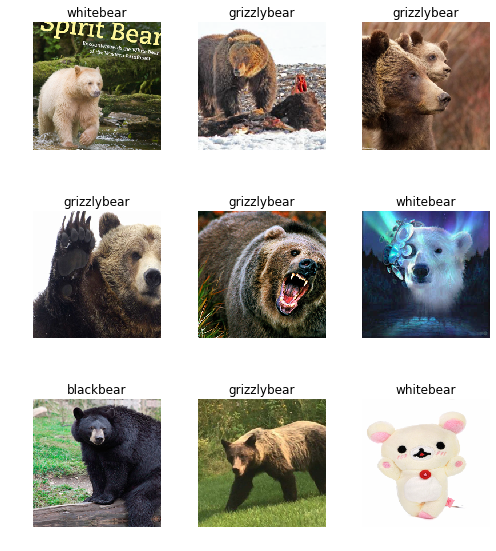

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
# 종류, 훈련데이터 수, 테스트데이터 수
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['blackbear', 'grizzlybear', 'whitebear'], 3, 109, 27)

In [ ]:
# resnet34 사용
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 60974809.19it/s]


In [ ]:
learn.fit_one_cycle(2) #  4--> 2

epoch,train_loss,valid_loss,error_rate,time
0,1.652029,1.641064,0.814815,01:22
1,1.580096,0.779752,0.333333,01:25


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

In [ ]:
learn.save('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(2)

In [ ]:
from fastai.widgets import *

# 오류가 큰 데이터셋과 인덱스를 얻는다
# ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

유사한 (중복된) 이미지는 .from_similars으로 찾을 수 있다.
ImageCleaner를 실행할 때 duplicates=True 옵션을 준다.

In [ ]:
# HANGGING ON....
# ImageCleaner(ds, idxs, path)

# ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

In [ ]:
img = open_image(path/'black'/'00000021.jpg')
img

In [ ]:
# FileDeleter가 설치되지 않음

# losses,idxs = interp.top_losses()
# top_loss_paths = data.valid_ds.x[idxs]
# fd = FileDeleter(file_paths=top_loss_paths)

In [ ]:
# export.pkl을 생성한다.
learn.export()

In [ ]:
!ls bears

In [ ]:
# 실행환경은 CPU일 것이므로 환경을 변경한다.
defaults.device = torch.device('cpu')

In [ ]:
earn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)

In [ ]:
pred_class

In [ ]:
# 훈련에 사용한 모델을 불러온다. 오류 발생...
# classes = ['black', 'grizzly', 'teddys']
# data2 = ImageDataBunch.single_from_classes(path, classes, 
#            tfms=get_transforms(), size=224).normalize(imagenet_stats)
# learn = create_cnn(data2, models.resnet34)
# learn.load('stage-2')